In [ ]:
EDA

In [ ]:
Summary Statistics:

In [29]:
# Summary statistics for air quality data
print("Air Quality Data Summary:")
print(df_air_quality.describe())

# Summary statistics for crop production data
print("\nCrop Production Data Summary:")
print(df_crop_production.describe())


Air Quality Data Summary:
             Value  Last_Updated
count   106.000000    106.000000
mean     69.948896   2019.622642
std     303.159053      1.290646
min       0.000000   2018.000000
25%       5.480500   2018.250000
50%      15.395000   2019.000000
75%      29.992500   2021.000000
max    3052.620000   2022.000000

Crop Production Data Summary:
              Y2018         Y2019         Y2020         Y2021         Y2022
count  4.010000e+02  4.010000e+02  4.010000e+02  4.010000e+02  4.010000e+02
mean   1.471295e+06  1.515139e+06  1.499640e+06  1.408275e+06  1.229314e+06
std    6.370919e+06  6.464096e+06  6.309980e+06  6.035440e+06  5.618679e+06
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    1.609000e+04  1.589000e+04  1.710600e+04  1.658000e+04  2.100000e+03
75%    2.297930e+05  2.716000e+05  2.975000e+05  2.583000e+05  1.103000e+05
max    5.667900e+07  5.519600e+07  5.3

In [ ]:
Data Distributions:

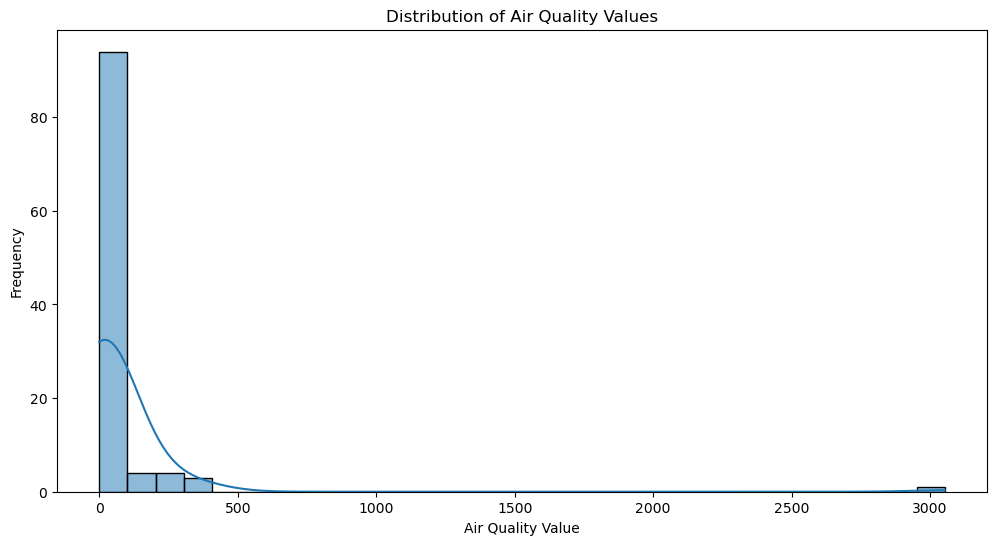

In [30]:
# Distribution of air quality values
plt.figure(figsize=(12, 6))
sns.histplot(df_air_quality['Value'], bins=30, kde=True)
plt.title('Distribution of Air Quality Values')
plt.xlabel('Air Quality Value')
plt.ylabel('Frequency')
plt.show()


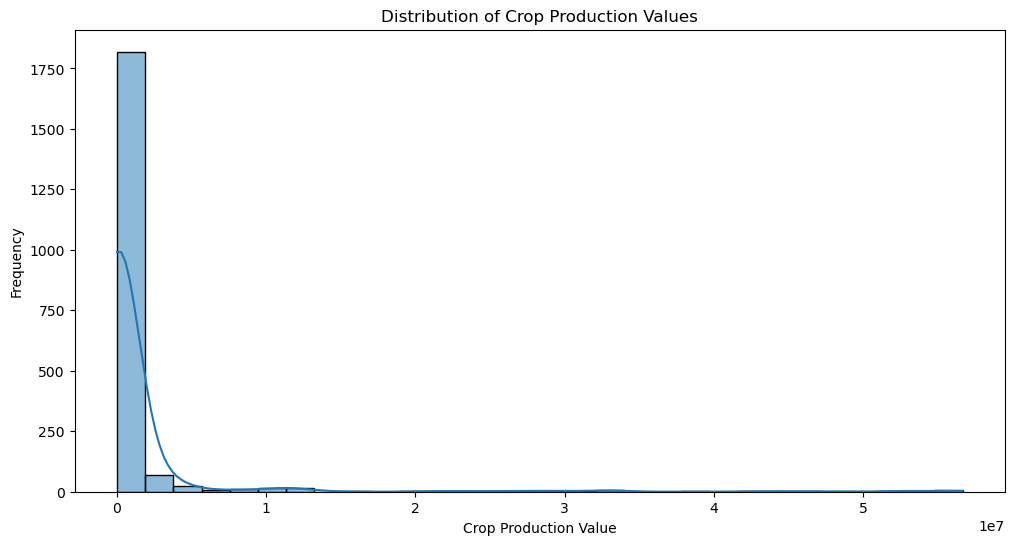

In [33]:
# Distribution of Crop production values
import numpy as np

# Melt the crop production DataFrame correctly
melted_crop_production = df_crop_production.melt(id_vars=['Area', 'Item', 'Element'], 
                                                 var_name='Year', 
                                                 value_name='Production')

# Convert the Production column to numeric, handling any errors
melted_crop_production['Production'] = pd.to_numeric(melted_crop_production['Production'], errors='coerce')

# Drop any rows with missing Production values
melted_crop_production.dropna(subset=['Production'], inplace=True)

# Distribution of crop production values
plt.figure(figsize=(12, 6))
sns.histplot(melted_crop_production['Production'], bins=30, kde=True)
plt.title('Distribution of Crop Production Values')
plt.xlabel('Crop Production Value')
plt.ylabel('Frequency')
plt.show()


In [ ]:
Correlation Heatmap

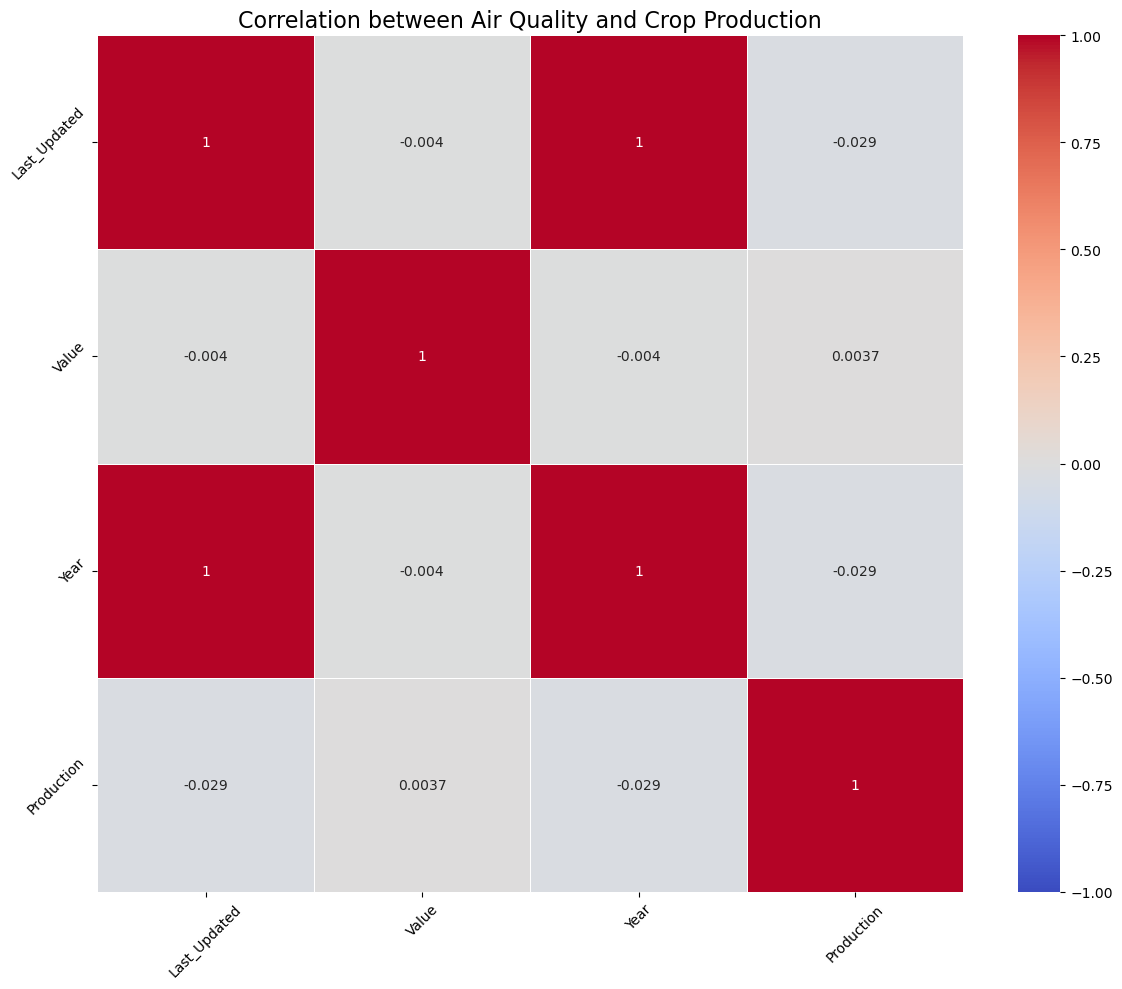

In [23]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the SQLite database
sqlite_db_path = '../data/data_base.db'  # Adjust this path to your actual path

# Load the data from the SQLite database
conn = sqlite3.connect(sqlite_db_path)

df_air_quality = pd.read_sql_query("SELECT * FROM air_quality", conn)
df_crop_production = pd.read_sql_query("SELECT * FROM crop_production", conn)

conn.close()

# Process the data
# Rename the column 'Last Updated' to 'Last_Updated' to remove the space for easier reference
df_air_quality.rename(columns={'Last Updated': 'Last_Updated'}, inplace=True)

# Group air quality data by year and pollutant
air_quality_yearly = df_air_quality.groupby(['Last_Updated', 'Pollutant'])['Value'].mean().reset_index()

# Group crop production data by year and item
crop_production_yearly = df_crop_production.melt(id_vars=['Area', 'Item', 'Element'], var_name='Year', value_name='Production')
crop_production_yearly['Year'] = crop_production_yearly['Year'].str.extract('(\d{4})').astype(int)
crop_production_yearly = crop_production_yearly.groupby(['Year', 'Item'])['Production'].mean().reset_index()

# Merge the datasets on the Year
merged_df = pd.merge(air_quality_yearly, crop_production_yearly, left_on='Last_Updated', right_on='Year')

# Filter numeric columns for correlation calculation
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_df[numeric_cols].corr()

# Customize and plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='white')
plt.title('Correlation between Air Quality and Crop Production', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
Trends Over Time

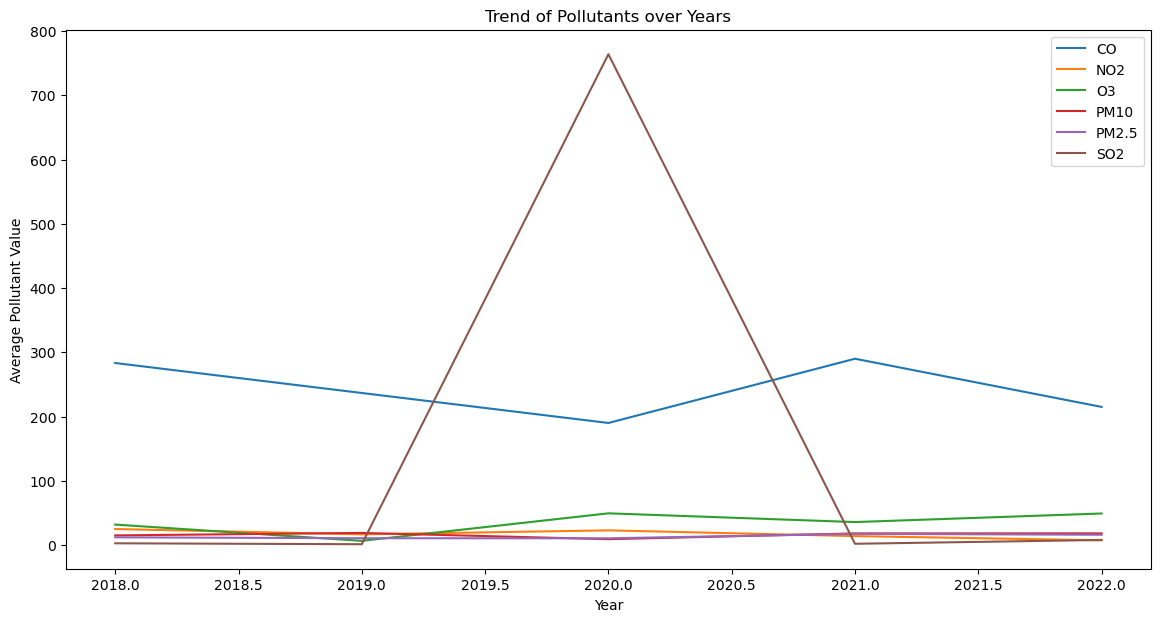

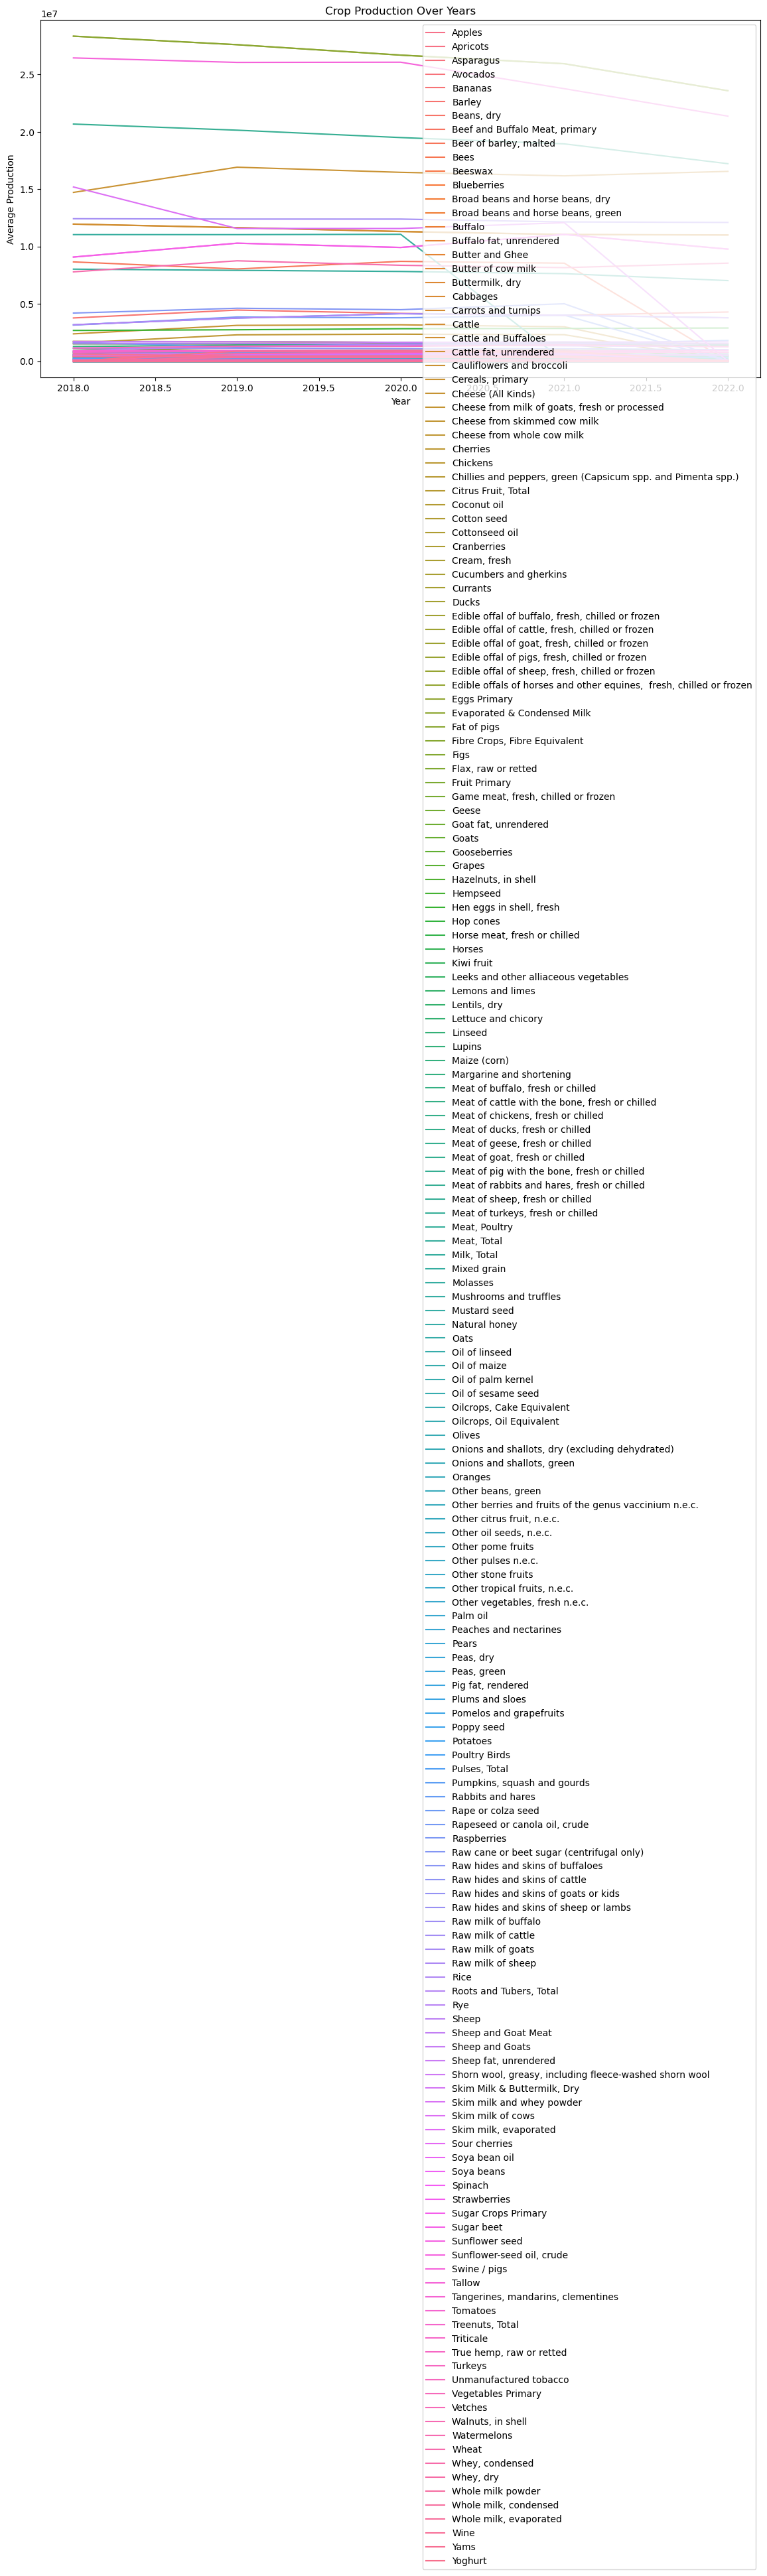

In [18]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the SQLite database
sqlite_db_path = '../data/data_base.db'  # Adjust this path to your actual path

# Load the data from the SQLite database
conn = sqlite3.connect(sqlite_db_path)

df_air_quality = pd.read_sql_query("SELECT * FROM air_quality", conn)
df_crop_production = pd.read_sql_query("SELECT * FROM crop_production", conn)

conn.close()

# Process the data
# Rename the column 'Last Updated' to 'Last_Updated' to remove the space for easier reference
df_air_quality.rename(columns={'Last Updated': 'Last_Updated'}, inplace=True)

# Group air quality data by year and pollutant
air_quality_yearly = df_air_quality.groupby(['Last_Updated', 'Pollutant'])['Value'].mean().reset_index()

# Group crop production data by year and item
crop_production_yearly = df_crop_production.melt(id_vars=['Area', 'Item', 'Element'], var_name='Year', value_name='Production')
crop_production_yearly['Year'] = crop_production_yearly['Year'].str.extract('(\d{4})').astype(int)
crop_production_yearly = crop_production_yearly.groupby(['Year', 'Item'])['Production'].mean().reset_index()

# Plot air quality over time
plt.figure(figsize=(14, 7))
for pollutant in air_quality_yearly['Pollutant'].unique():
    pollutant_data = air_quality_yearly[air_quality_yearly['Pollutant'] == pollutant]
    plt.plot(pollutant_data['Last_Updated'], pollutant_data['Value'], label=pollutant)
plt.xlabel('Year')
plt.ylabel('Average Pollutant Value')
plt.title('Trend of Pollutants over Years')
plt.legend()
plt.show()

# Plot crop production over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Production', hue='Item', data=crop_production_yearly)
plt.title('Crop Production Over Years')
plt.xlabel('Year')
plt.ylabel('Average Production')
plt.legend()
plt.show()


In [ ]:
Comparing Distributions using box plots

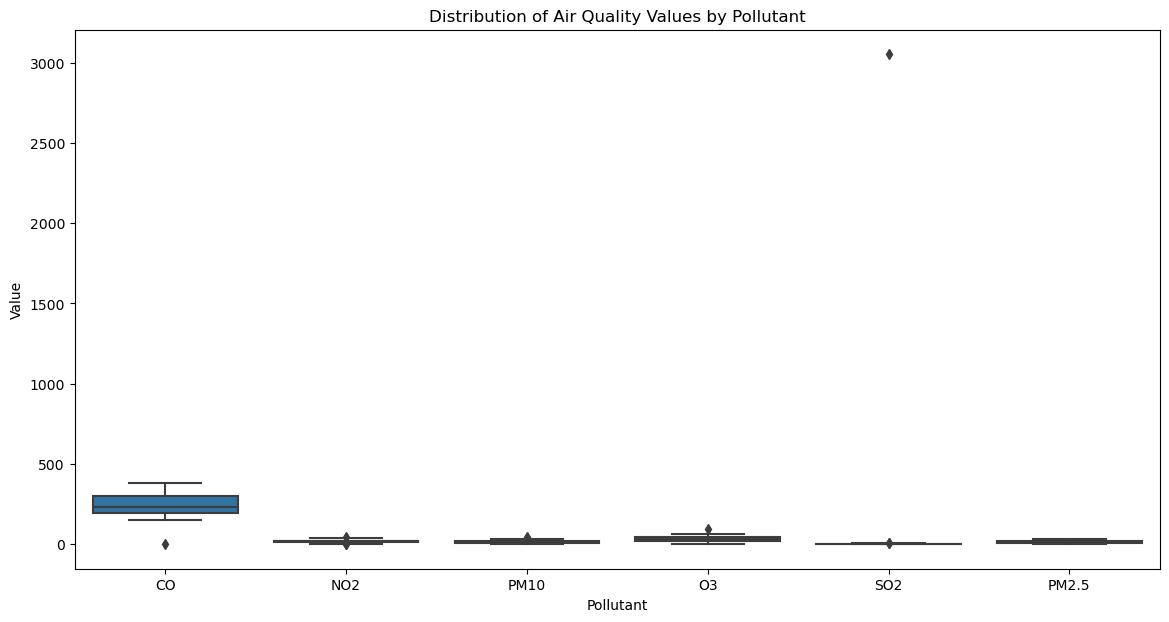

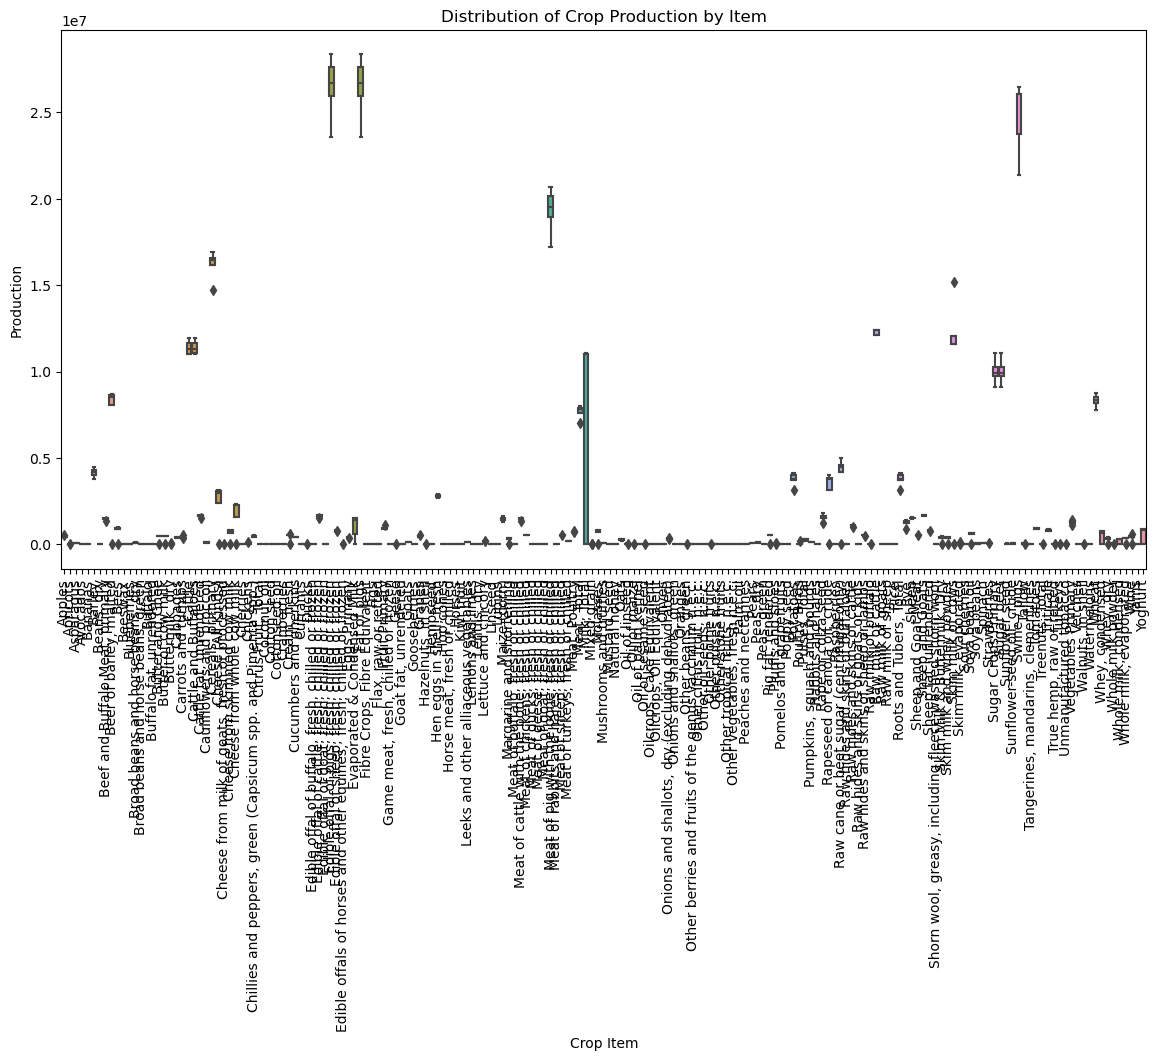

In [24]:
# Box plot of air quality values by pollutant
plt.figure(figsize=(14, 7))
sns.boxplot(x='Pollutant', y='Value', data=df_air_quality)
plt.title('Distribution of Air Quality Values by Pollutant')
plt.xlabel('Pollutant')
plt.ylabel('Value')
plt.show()

# Box plot of crop production values by item
plt.figure(figsize=(14, 7))
sns.boxplot(x='Item', y='Production', data=crop_production_yearly)
plt.title('Distribution of Crop Production by Item')
plt.xlabel('Crop Item')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.show()


In [ ]:
Applying machine learning model

In [ ]:
Finding non-Linear Relationship:


Gradient Boosting R-squared: -2.513079676193343
Gradient Boosting RMSE: 3882074.571641733


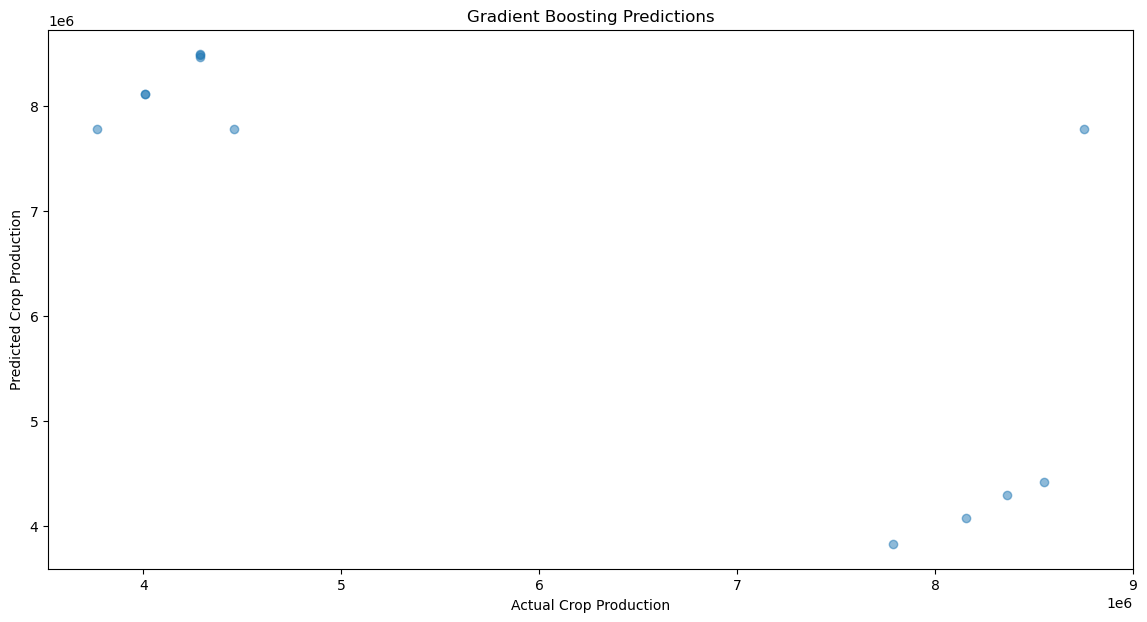

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Filter data for specific crops, e.g., Wheat and Barley
df_specific_crops = merged_df[merged_df['Item'].isin(['Wheat', 'Barley'])]
df_specific_crops = df_specific_crops.dropna()

# Feature Engineering
X = df_specific_crops[['Value', 'Year']]
y = df_specific_crops['Production']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate Model
gb_r2 = r2_score(y_test, y_pred_gb)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"Gradient Boosting R-squared: {gb_r2}")
print(f"Gradient Boosting RMSE: {gb_rmse}")

# Visualize Predictions
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.xlabel('Actual Crop Production')
plt.ylabel('Predicted Crop Production')
plt.title('Gradient Boosting Predictions')
plt.show()


In [ ]:
Implementing Feature Importance Analysis and PDPs:

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Filter data for specific crops, e.g., Wheat and Barley
df_specific_crops = merged_df[merged_df['Item'].isin(['Wheat', 'Barley'])]

# Handle missing values
df_specific_crops = df_specific_crops.dropna()

# Feature Engineering
X = df_specific_crops[['Value', 'Year']]
y = df_specific_crops['Production']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

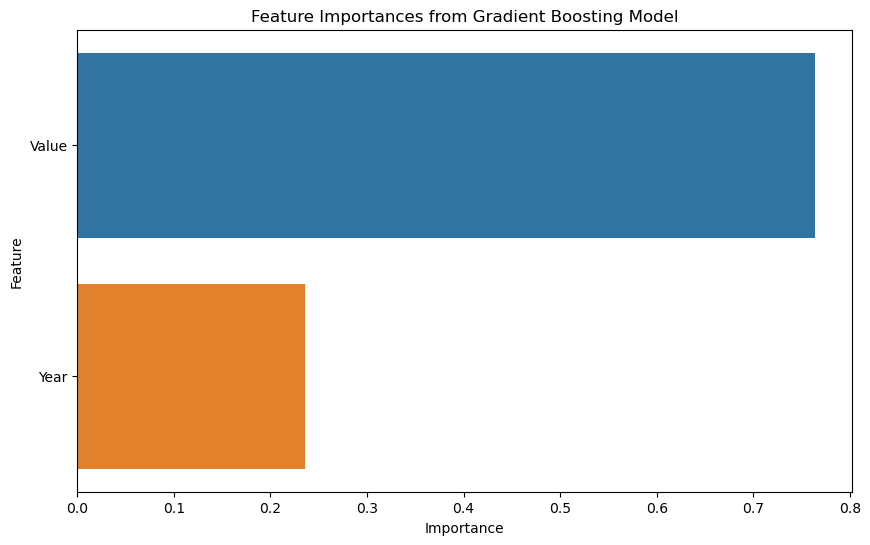

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance from Gradient Boosting model
feature_importances = gbr.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances from Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


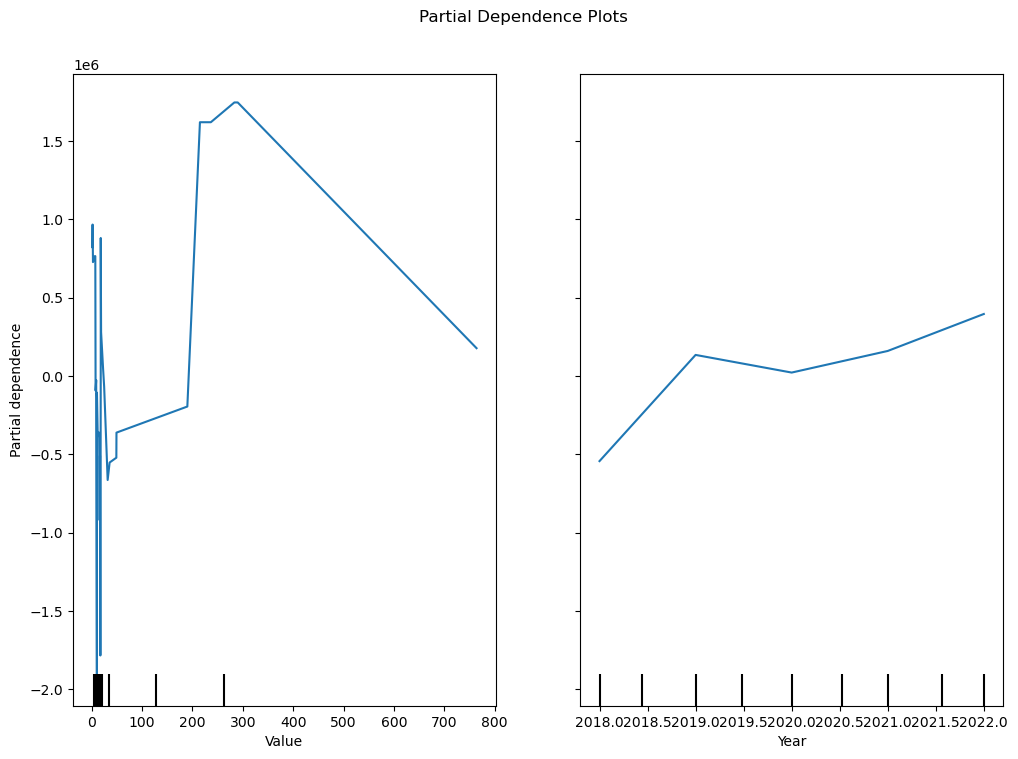

In [17]:
from sklearn.inspection import PartialDependenceDisplay

# Partial dependence plots for air quality features
features_to_plot = ['Value', 'Year']

fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(gbr, X, features_to_plot, ax=ax)
plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)  # Adjust subplot to fit title
plt.show()
